In [ ]:
from pre_process_data import make_training_data
data = make_training_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team1_id      623 non-null    int64  
 1   Team2_id      623 non-null    int64  
 2   result        623 non-null    bool   
 3   Rating        623 non-null    float64
 4   Kda           623 non-null    float64
 5   openRating    623 non-null    float64
 6   pistolRating  623 non-null    float64
 7   last10m       623 non-null    float64
dtypes: bool(1), float64(5), int64(2)
memory usage: 34.8 KB


Data consist features of mean of team players statistics divided from the mean values from opposite team. 
Data is gathered from various websites by webscrapping, then it is stored in database to ensure integrity,consistency, efficient retrieval and scalability.

In [ ]:
data.head()

,Team1_id,Team2_id,result,Rating,Kda,openRating,pistolRating,last10m
0,28,39,True,0.024,0.032,-0.016,-0.072,1.0
1,143,66,True,0.084,0.112,0.018,0.024,42.0
2,20,54,False,-0.032,-0.048,-0.044,-0.052,12.0
3,5,67,True,0.082,0.084,0.038,0.040,0.0
4,34,97,False,0.072,0.096,0.014,0.166,2.0


Variable rating is value of players calculated by hltv of overall Player performance.
Kda is Kill/death/assist ratio from player matches.
openRating is the rating of player getting opening(first) kills in round
pistolRating is the rating of player performing in pistol rounds
last10m is Team performance in last 10 matches

Variable,Kda,openRating and pistolRating are calculated by getting the average of all players from team and then dividing values of Team1 minus Team2

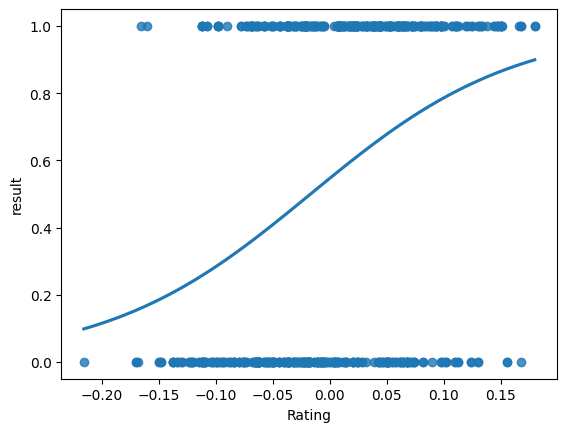

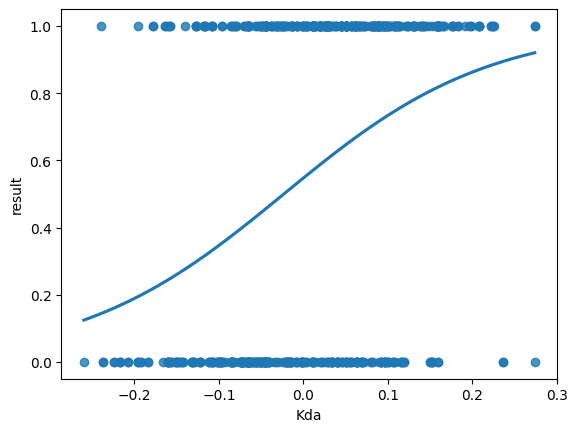

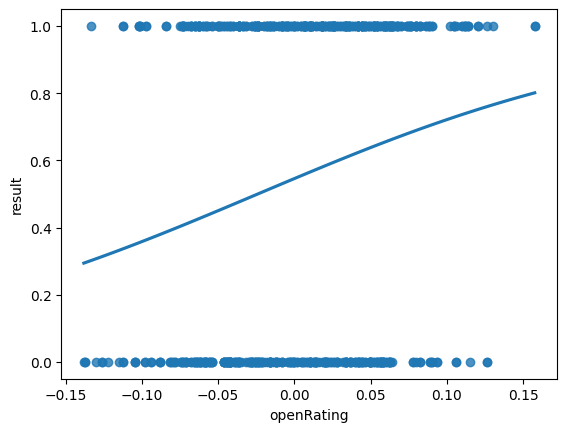

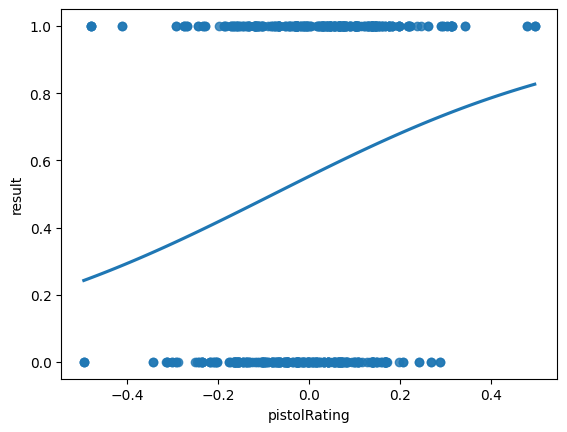

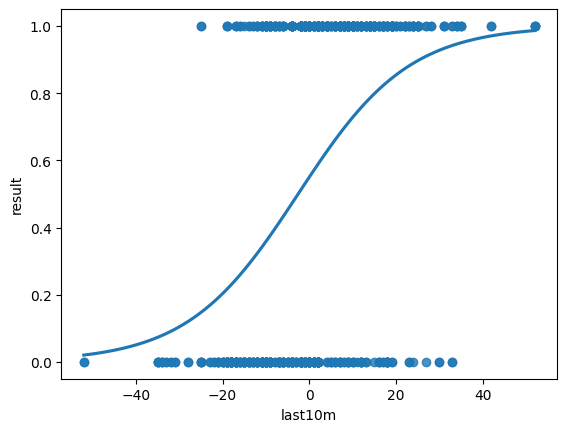

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
y=data['result'].astype(int)
X=data[["Rating","Kda","openRating","pistolRating","last10m"]].astype(float)

for i in X.columns:
    sns.regplot(x=X[i],y=y,logistic=True,ci=None)
    plt.show()

Plots show that teams with higher values tends to perform better and win more matches

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.load_model("xgb_matches1.json")
model.feature_importances_

array([0.19703144, 0.21728691, 0.1473873 , 0.14861725, 0.28967705],
      dtype=float32)

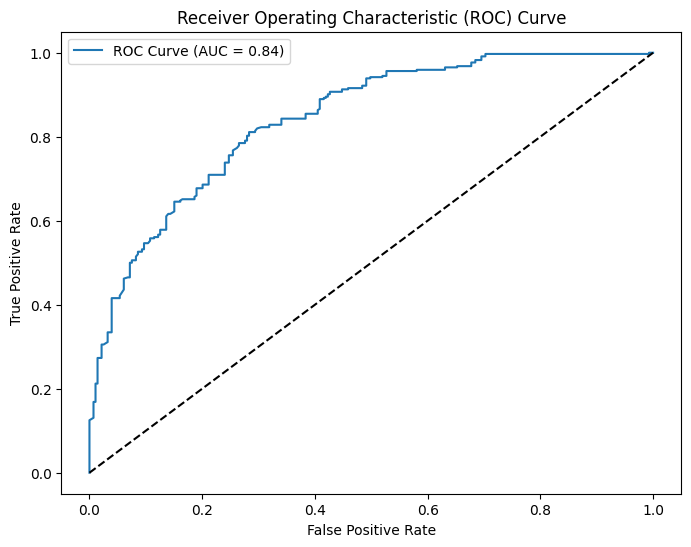

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model.predict_proba(X)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y, y_proba)
roc_auc_test = roc_auc_score(y, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score
predict_test = model.predict(X)
precision = precision_score(y, predict_test)
print("Precision:", precision)

Precision: 0.7690217391304348


Metrics shows that model predicts winning team with high ratio. In evaluating model we focus more on its precision because the false positive can result in losing money while betting.
With this precision optimal betting using Kelly's criterion should result in continious profit